In [1]:
import numpy as np

In [2]:
from flair.data import Sentence
from flair.models import SequenceTagger

In [3]:
tagger_ner = SequenceTagger.load('ner')

In [4]:
tagger_pos = SequenceTagger.load('pos')

In [5]:
sentence = Sentence('George Washington went to Washington .')

In [6]:
tagger_ner.predict(sentence)

[Sentence: "George Washington went to Washington ." - 6 Tokens]

In [7]:
tagger_pos.predict(sentence)

[Sentence: "George Washington went to Washington ." - 6 Tokens]

In [8]:
print(sentence.to_tagged_string())

George <B-PER/NNP> Washington <E-PER/NNP> went <VBD> to <IN> Washington <S-LOC/NNP> . <.>


In [9]:
from flair.embeddings import CharLMEmbeddings

In [10]:
charlm_embedding_forward = CharLMEmbeddings('news-forward')

In [11]:
sentence1 = "A protest occurred in Nebraska between two groups."
sentence2 = "An incident involving 2 groups from Lincoln is reported."

In [12]:
sentence1 = Sentence(sentence1)
sentence2 = Sentence(sentence2)
s1e = charlm_embedding_forward.embed(sentence1)
s2e = charlm_embedding_forward.embed(sentence2)

In [13]:
#from sklearn.metrics.pairwise import cosine_similarity

In [14]:
e1a = []
for t in sentence1.tokens:
    e1 = np.asarray(t.embedding)
    e1a.append(e1)
e1a = np.asarray(e1a).sum(axis=0)
e2a = []
for t in sentence2.tokens:
    e2 = np.asarray(t.embedding)
    e2a.append(e2)
e2a = np.asarray(e2a).sum(axis=0)

In [25]:
#e1 = np.asarray(sentence1.tokens[0].embedding)
#e2 = (np.asarray(sentence2.tokens[0].embedding) + np.asarray(sentence2.tokens[1].embedding)) /2.0

In [15]:
from numpy import dot
from numpy.linalg import norm

cos_sim = dot(e1a, e2a)/(norm(e1a)*norm(e2a))

In [16]:
cos_sim

0.7170097

In [51]:
###

In [5]:
import numpy as np
import pandas as pd
import re
import nltk
from mediawiki import MediaWiki
from bs4 import BeautifulSoup
import string
from nltk import tokenize
from nltk.tag import StanfordNERTagger
import string
from nltk.tokenize import word_tokenize
import unicodedata
import timeit

In [6]:
df = pd.read_csv('../GDELT_2017/unrest_gdelt_2017_all.csv')

In [7]:
df = df.sample(n=100)

In [8]:
# Function for removing unnecessary characters.
def clean_str(string):
    """
    Tokenization/string cleaning for dataset
    Every dataset is lower cased except
    """
    string = re.sub(r"\\", " ", string)
    string = re.sub(r"\'", " ", string)
    string = re.sub(r"\"", " ", string)
    string = re.sub(r"\n", " ", string)
    string = re.sub(r"=", " ", string)
    string = re.sub(r"-", " ", string)
    string = re.sub(r"/", " ", string)
    string = re.sub(r"the","",string)
    string = re.sub(r",","",string)
    return string.strip()

In [9]:
counts = {}
all_counts = {}
for i,row in df.iterrows():
    print(i)
    test_data = row['content']
    test_data = unicodedata.normalize("NFKD", test_data)
    test_data = clean_str(test_data)
    text_sent = nltk.sent_tokenize(test_data)
    for sent in text_sent:
        #text_tags = nltk.word_tokenize(sent)
        sentence = Sentence(sent);
        tagger_ner.predict(sentence)
        #original_tags = st.tag(text_tags)
        #text_tagged = nltk.pos_tag(text_tags)
        tagger_pos.predict(sentence)
        for s in sentence.get_spans('pos'):
            s = str(s).split(" ");
            if "IN" in s[0]:
                e = s[2].strip('"');
                if e.lower() in all_counts:
                    all_counts[e.lower()] = all_counts[e.lower()]+1
                else:
                    all_counts[e.lower()] = 1
        for s in sentence.get_spans('ner'):
            s = str(s).split(" ");
            if "LOC" in s[0]:
                if int(s[1][1]) >0:
                    e = str(sentence.tokens[int(s[1][1])-2]).split(" ")[2]
                    if e.lower() in counts:
                        counts[e.lower()] = counts[e.lower()]+1
                    else:
                        counts[e.lower()] = 1

24864
13533
26001
43594
5220
14955
27045
40966
42713
440
31385
19558
23775
49612
137
956
31630
42001
50905
19144
26260
21212
26376
40418
45441
34348
3429
11724
36281
3111
22056
4359
28063
20008
19894
41438
35156
14309
46849
41201
13409
19785
33774
44064
24163
24214
6186
25644
9393
10339
44951
30720
48645
2783
9872
9875
17773
31600
13512
16074
42579
46546
5412
32776
44930
27075
20091
740
923
50781
31540
50043
19282
1406
24573
12099
4
40304
21617
2021
32088
15793
48398
833
3153
30714
9092
27328
38292
25522
238
32448
49696
41304
9473
30928
17812
36427
19909
49703


In [12]:
final_probs = {};
for c in all_counts.keys():
    if c in counts.keys():
        final_probs[c] = counts[c]/all_counts[c]

In [14]:
sorted_fp = sorted(final_probs.items(), key=lambda kv: kv[1])

In [15]:
x_val = [x[0] for x in sorted_fp]
y_val = [x[1] for x in sorted_fp]

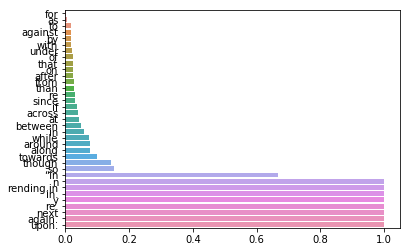

In [18]:
import seaborn as sns
%matplotlib inline
sns_plot = sns.barplot(y_val,x_val)